# Модель для прогнозирования оттока клиентов для сервиса доставки кофе

# План работы

____    
    
**Название проекта**

Модель для прогнозирования оттока клиентов для сервиса доставки кофе
_____
**Описание исследования**

Клиент Happy Beans Coffee столкнулся с ежемесячным оттоком 10% пользовательской базы после запуска сервиса доставки. Учитывая, что привлечение новых покупателей обходится в 5–7 раз дороже удержания, текущие маркетинговые затраты не окупаются. Цель проекта - разработка модели прогнозирования оттока клиентов (churn prediction) для сохранения выручки и оптимизации бюджета.
_____
**Цель исследования**

- Построить модель бинарной классификации, которая спрогнозирует вероятность оттока каждого клиента в следующем месяце.
- Целевая переменная: churn (перестал ли пользователь пользоваться сервисом).
- В качестве метрики будет использоваться: Precision-Recall AUC (PR AUC). Она фокусируется на корректном предсказании меньшего по объёму, но ключевого для задачи класса - уходящих клиентов.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели.
_____
**Задачи исследования**

- Подготовить среды и библиотеки.
- Провести исследовательский анализ данных (EDA).
- Предобработать данные.
- Обучить и оценить базовые модели.
- Создать и отобрать новые признаки.
- Подобрать гиперпараметры модели.
- Финальное обучение модели и подготовка артефактов.

_____
**Исходные данные**

- user_id — идентификатор пользователя.
- days_since_last_order — количество дней, прошедших с последнего заказа.
- order_frequency_month — среднее число заказов в месяц.
- order_frequency_week — среднее число заказов в неделю.
- avg_order_value — средний чек, в рублях.
- median_order_value — медианный чек, в рублях.
- total_spent_last_month — сумма заказов за последний месяц.
- total_spent_last_week — сумма заказов за последнюю неделю.
- discount_usage_rate — доля заказов со скидкой за последний месяц.
- last_coffee_type — сорт кофе, купленный пользователем в последний раз на момент сбора данных.
- preferred_roast — предпочитаемый тип обжарки.
- milk_preference — предпочитаемый тип молока.
- seasonal_menu_tried — отметка о том, пробовал ли пользователь новейшее сезонное меню.
- coffee_bean_origin — страна происхождения зерна.
- last_drink_size — размер последнего заказа, совершённого на момент сбора данных.
- subscription_status — тип подписки пользователя.
- app_opens_per_week — сколько раз за неделю пользователь в среднем открывал приложение доставки кофе.
- notifications_enabled — включены ли у пользователя уведомления.
- review_rating_last_10 — средняя оценка последних на момент сбора данных десяти заказов клиента.
- review_rating_last_1 — оценка последнего на момент сбора данных заказа клиента.
- app_crashes_last_month — сколько раз приложение зависало за последний месяц.
- seasons — текущее время года.
- days_since_last_promo — сколько дней прошло с последнего использования акции или промокода.
- phone_type — тип устройства, с которого пользователь чаще всего совершал покупки.
- coffee_preference_change — менялись ли вкусовые предпочтения пользователя.
- geo_id — идентификатор региона пользователя.
- churn — перестал ли пользователь пользоваться сервисом.
______

**Данное исследование разделим на несколько частей**

***Часть 1. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 2. Подключение и настройка библиотек:***
* [1. Загрузка и импорт библиотек](#2-bullet)

***Часть 3. Загрузка датасета:***
* [1. Извлечение данных из датасета](#3-bullet)
* [2. Ознакомление с загруженным датасетом](#4-bullet)

***Часть 4. Исследовательский анализ данных***
* [1. Отбор признаков по одному виду черепах](#5-bullet)
* [2. Удаление нерелевантных признаков](#6-bullet)
* [3. Обработка пропусков](#7-bullet)
* [4. Удаление явных и неявных дубликатов](#8-bullet)
* [5. Cтатистическое описание данных](#9-bullet)
* [6. Построение гистограмм и графиков boxplot для анализа признаков](#10-bullet)
* [7. Фильтрация аномалий](#11-bullet)
* [8. Проверка корреляции между признаками](#12-bullet)
* [9. Генерация новых признаков в данных](#13-bullet)

***Часть 5. Предобработка данных***
* [1. Разбиение данных на выборки](#14-bullet)
* [2. Масштабирование признаков](#15-bullet)
* [3. Визуализация масштабирования](#16-bullet)

***Часть 6. Обучение моделей***
* [1. Расчет метрик](#17-bullet)
* [2. Функция для конкатенации результатов обученных моделей](#18-bullet)
* [3. Обучение моделей: DummyRegressor, LinearRegression, Lasso, Ridge, SGDRegressor](#19-bullet)

***Часть 7. Сравнение моделей на валидационной выборке***
* [1. Вывод топ-5 лучших моделей](#20-bullet)

***Часть 8. Проверка лучшей модели на тестовой выборке***
* [1. Финальная проверка лучшей модели на тестовой выборке](#21-bullet)

***Часть 9. Оценка важности признаков***
* [1. Оценка важности](#22-bullet)

***Часть 10. Функция для прогнозирования веса черепахи***
* [1. Функция прогнозирования](#23-bullet)
* [2. Тестирование](#24-bullet)

***Часть 11. Общие выводы и рекомендации по дальнейшей работе***
* [1. Выводы](#25-bullet)

## Этап 1. Подготовка среды и библиотек

1. Установка библиотек

In [113]:
import os

req = 'requirements.txt'
if os.path.exists(req):
    !pip install -qr requirements.txt
else:
    !pip install -qU ipykernel scikit-learn numpy pandas matplotlib seaborn phik jinja2 joblib

437.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


2. Импорт библиотек

In [ ]:

import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

pd.set_option('display.max_columns', None)

3. Фиксация глобальных констант

In [115]:
RANDOM_STATE = 42

4. Загрузка датасета

In [116]:
pth1 = 'coffee_churn_dataset.csv'
pth2 = '/datasets/coffee_churn_dataset.csv'

if os.path.exists(pth1):
    original_df = pd.read_csv(pth1, sep=',', decimal='.')
elif os.path.exists(pth2):
    original_df = pd.read_csv(pth2, sep=',', decimal='.')
else:
    raise "Путь до датасета неверный"

## Этап 2. Первичный анализ данных

1. Анализ данных пользователей и их вовлеченности

In [117]:
original_df.head()

,user_id,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,user_00318,0.0,12.942519,NaN,316.833872,260.645090,3089.991009,NaN,0.337031,blend,light,almond,NaN,vietnam,large,pro,30.468321,1.0,5.176792,3.302238,NaN,summer,6.0,android,0.0,geo_75,1
1,user_07234,2.0,1.569146,0.214494,780.135158,540.597850,998.380941,107.369409,0.547659,arabica,light,whole,1.0,guatemala,medium,none,NaN,1.0,4.392991,NaN,0.0,autumn,16.0,ios,0.0,geo_95,0
2,user_04816,11.0,2.996666,0.771864,682.636256,471.494559,1328.140204,392.600011,0.120258,arabica,medium,oat,1.0,guatemala,small,premium,17.895637,1.0,4.977712,4.379219,0.0,spring,11.0,web,1.0,geo_25,0
3,user_04419,0.0,4.299255,1.210480,2115.487425,708.529812,2999.628366,1084.352054,NaN,robusta,medium,skim,0.0,brazil,medium,none,11.405533,1.0,3.712526,3.043618,0.0,summer,3.0,android,0.0,geo_2,0
4,user_09698,3.0,7.249864,1.761027,3519.602170,1199.372894,8377.729478,2551.775211,0.074990,robusta,dark,almond,1.0,colombia,medium,none,15.948239,0.0,4.528271,5.642993,1.0,winter,14.0,ios,0.0,geo_19,1


In [118]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10450 non-null  object 
 1   days_since_last_order     9505 non-null   float64
 2   order_frequency_month     9850 non-null   float64
 3   order_frequency_week      10062 non-null  float64
 4   avg_order_value           9867 non-null   float64
 5   median_order_value        9619 non-null   float64
 6   total_spent_last_month    10156 non-null  float64
 7   total_spent_last_week     9506 non-null   float64
 8   discount_usage_rate       10053 non-null  float64
 9   last_coffee_type          10192 non-null  object 
 10  preferred_roast           10334 non-null  object 
 11  milk_preference           9782 non-null   object 
 12  seasonal_menu_tried       9461 non-null   float64
 13  coffee_bean_origin        9768 non-null   object 
 14  last_d

Обработка некорректных типов и понижение размерности pandas датасета

In [119]:
for column in ['days_since_last_order', 'app_crashes_last_month', 'days_since_last_promo', 'seasonal_menu_tried', 'notifications_enabled', 'coffee_preference_change', 'churn']:
    original_df[column] = original_df[column].astype('Int16')

for column in [
    'order_frequency_month', 
    'order_frequency_week', 
    'avg_order_value', 
    'median_order_value',
    'total_spent_last_month',
    'total_spent_last_week',
    'discount_usage_rate',
    'app_opens_per_week',
    'seasonal_menu_tried',
    'notifications_enabled',
    'review_rating_last_10',
    'review_rating_last_1'
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='float')

В датасете 10 450 пользователей и целевая переменная churn (бинарный признак оттока).

О пользователях известна следующая ключевая информация:
- Финансы: частота заказов, средний чек (средний и медианный), траты за последний период, использование скидок и давность последнего заказа.

- Предпочтения: тип обжарки, молока, происхождение зерна, размер напитка, изменение вкусов и пробовали ли сезонное меню.

- Вовлеченность: частота открытия приложения, статус подписки, оценки заказов, количество сбоев приложения, включены ли уведомления.

- Контекстные данные: тип устройства, географическая локация и сезон.

Почти все признаки имеют пропуски, что потребует предобработки перед обучением модели.


---

2. Анализ целевой переменной

In [120]:
churn_desc = original_df['churn'].describe()

churn_desc

count     10450.0
mean     0.060191
std      0.237852
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: churn, dtype: Float64

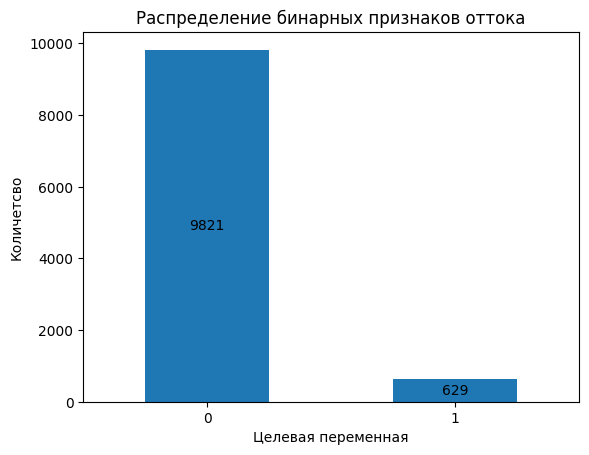

In [121]:
churn_counts = original_df['churn'].value_counts()

ax = churn_counts.plot(
    kind='bar',
    title='Распределение бинарных признаков оттока',
    xlabel='Целевая переменная',
    ylabel='Количетсво',
    rot=0
)

ax.bar_label(ax.containers[0], label_type='center')

plt.show()

In [122]:
print(f'Лояльные клиенты: {churn_counts[0] / churn_desc['count'] * 100:.0f}%')
print(f'Ушедшие клиенты: {churn_counts[1] / churn_desc['count'] * 100:.0f}%')

Лояльные клиенты: 94%
Ушедшие клиенты: 6%


Целевая переменная churn является бинарной и указывает на отток клиентов, что подтверждает необходимость обучать именно LogisticRegression.

В данных наблюдается сильный дисбаланс классов: 94% наблюдений относятся к классу с лояльными клиентами и только 6% - к классу с ушедшими клиентами.

Из-за такого соотношения стандартная метрика accuracy будет неинформативна. Для оценки качества модели следует использовать метрику, устойчивую к дисбалансу: PR-AUC.

---

3. Описание признаков

Признаки, которые стоит удалить: 
1. Идентификаторы
- user_id - модель может начать запоминать их вместо общих закономерностей, что приведет к переобучению
2. Мультиколлинеарность
- order_frequency_week и order_frequency_month - удалить order_frequency_week. Признак order_frequency_month более устойчивый к шуму.

- avg_order_value и median_order_value - удалить avg_order_value. Медиана более устойчива к выбросам.

- total_spent_last_week и total_spent_last_month - удалить order_frequency_week. total_spent_last_month - более стабильный и релевантный индикатор снижения вовлеченности.
    
    - review_rating_last_1 и review_rating_last_10 - стоит проверить два признака на их корреляцию между собой. Если окажется, что они друг на друга не влияют, то последний отзыв может говорить об эмоциональной реакции, а крайние 10 о стабильном, усредненном тренде.

Остальная фильтрация признаков будет на этапе просмотра корреляций.

In [123]:
df = original_df.copy()

df = df.drop(columns=['user_id', 'order_frequency_week', 'avg_order_value', 'total_spent_last_week'])

Удаление явных дубликатов

In [124]:
print('Число явных дубликатов:', df.duplicated().sum())

df = df.drop_duplicates()

Число явных дубликатов: 414


---

Создание копии датасета для EDA анализа

In [125]:
df_eda = df.copy()
temp_len = len(df_eda)

Обработка пропущенных значений

In [126]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

show_missing_stats(df_eda)

,Кол-во пропусков,Доля пропусков
seasonal_menu_tried,950,9.47%
days_since_last_order,902,8.99%
subscription_status,892,8.89%
app_opens_per_week,857,8.54%
review_rating_last_1,822,8.19%
median_order_value,804,8.01%
days_since_last_promo,698,6.95%
app_crashes_last_month,694,6.92%
review_rating_last_10,674,6.72%
seasons,654,6.52%


План обработки пропущенных значений: 

- seasonal_menu_tried - пользователь никогда не пробовал меню. Заполнить 0.

- days_since_last_order и days_since_last_promo - клиент никогда не заказывал/использовал промокод. Заполнить 0 нельзя (это будет значить заказывал/использовал сегодня), можно применить к признаку инверсию и перенести логику в recency_score, чем ближе его значение к 1, тем недавнее заказывали/использовали промокод. Формула расчета: 1 / (days + 1)

- subscription_status - пользователь не имеет платной подписки. Заполнить значением, которое уже есть в признаке - 'none'.

- app_opens_per_week - пользователь не пользовался приложением. Заполнить 0.

- review_rating_last_1 и review_rating_last_10 - заполнить средним + добавить флаг при обучении. Если отзыва нет, первое слагаемое станет медианой, а второе (флаг) скорректирует предсказание.

- median_order_value, order_frequency_month и total_spent_last_month - восстановить пропуски через преобразование значений двух других столбцов из 3. К примеру, если у пользователя есть траты, но нет медианного чека, можно аппроксимировать делением общего чека всех покупок на их кол-во. Если же значения в 2-х и более признаках пустые, стоит заполнит 0, так как это можно трактовать как отсутствие заказов.

- app_crashes_last_month - нет данных о крашах - приложение работало стабильно. Заполнить 0.

- coffee_bean_origin, seasons, last_drink_size, phone_type - создание отдельной категории для незаполненных категориальных данных 'unknown'. При этом на этапе обучения модели данные параметры будут переводиться через OneHotEncoder с параметром handle_unknown - ignore, чтобы учитывать в данных пропуски (получить вектор из 0).

- milk_preference - предпочтительное молоко у пользователя отсутствует. Заполнить существующей категорией 'none'.

- coffee_preference_change - предпочтения не менялись. Заполнить 0.

- notifications_enabled - у пользователя выключены уведомления. Заполнить 0.

- discount_usage_rate - скидками не пользовался. Заполнить 0.

- last_coffee_type, preferred_roast и geo_location - имеют <2.5% пропусков, пустые значения в данных признаках будут удалены.

Создание функции для инверсии

In [127]:
def inverse_transform(x):
    return 1 / (x + 1)

In [128]:
df_eda = df_eda.dropna(subset=['last_coffee_type', 'preferred_roast', 'geo_location'])

days_since_cols = ['days_since_last_order', 'days_since_last_promo']
num_cols = [*days_since_cols, 'seasonal_menu_tried', 'app_opens_per_week', 'app_crashes_last_month', 'coffee_preference_change', 'notifications_enabled', 'discount_usage_rate']
df_eda[num_cols] = df_eda[num_cols].fillna(0)

df_eda[days_since_cols] = df_eda[days_since_cols].apply(inverse_transform)

inferred_median = df_eda['total_spent_last_month'] / df_eda['order_frequency_month'].replace(0, np.nan)
inferred_total  = df_eda['median_order_value'] * df_eda['order_frequency_month']
inferred_freq   = df_eda['total_spent_last_month'] / df_eda['median_order_value'].replace(0, np.nan)

df_eda['median_order_value'] = df_eda['median_order_value'].fillna(inferred_median).fillna(0)
df_eda['total_spent_last_month'] = df_eda['total_spent_last_month'].fillna(inferred_total).fillna(0)
df_eda['order_frequency_month'] = df_eda['order_frequency_month'].fillna(inferred_freq).fillna(0)

cat_cols = ['coffee_bean_origin', 'seasons', 'last_drink_size', 'phone_type']
df_eda[cat_cols] = df_eda[cat_cols].fillna('unknown')

cat_cols_with_none = ['subscription_status', 'milk_preference']
df_eda[cat_cols_with_none] = df_eda[cat_cols_with_none].fillna('none')

review_cols = ['review_rating_last_1', 'review_rating_last_10']
df_eda[review_cols] = df_eda[review_cols].fillna(df_eda[review_cols].median())

show_missing_stats(df_eda)

'Пропусков в данных нет'

---

Анализ категориальных признаков

In [129]:
def check_cat_features(df_eda):
    cat_df = df_eda.select_dtypes(include=['object'])

    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df_eda[col].unique(),
            'Кол-во': df_eda[col].nunique(),
        })

    return pd.DataFrame(data)

check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta]",3
1,preferred_roast,"[light, medium, dark]",3
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",100


Большинство категориальных признаков имеют от 3 до 7 уникальных значений, что меньше 10, а значит к ним можно применить OneHotEncoder, который создаст новые признаки на их основе.

geo_location - единственный признак с большим числом уникальных значений (кол-во: 100). В данно случае нужно применить TargetEncoding, иначе он зашумит модель.

Данных в датасете достаточно, чтобы попробовать комбинации разных признаков

In [130]:
# Экономическая мотивация
df_eda['sub_size_interact'] = df_eda['subscription_status'] + '_' + df_eda['last_drink_size']

# Cегментация вкуса
df_eda['taste_profile'] = df_eda['preferred_roast'] + '_' + df_eda['milk_preference']

# Поведенческие паттерны
df_eda['season_size'] = df_eda['seasons'] + '_' + df_eda['last_drink_size']


In [131]:
check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta]",3
1,preferred_roast,"[light, medium, dark]",3
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",100
9,sub_size_interact,"[pro_large, none_medium, premium_small, none_l...",16


Новые признаки имеют больше 10 уникальных значений, значит пробразование через OHE не подойдёт, т.к. это раздует датасет. К этим новым параметрам можно применить Target Encoding.

Удаление признаков, которые не подходят для обучения будут удалены после проверки корреляции. Некоторые из категорий могут показаться не релевантными, но на деле будут влиять на предсказание решений клиента.

---

Анализ выбросов

In [132]:
df_eda.describe()

,days_since_last_order,order_frequency_month,median_order_value,total_spent_last_month,discount_usage_rate,seasonal_menu_tried,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,days_since_last_promo,coffee_preference_change,churn
count,9578.0,9578.000000,9578.000000,9578.000000,9578.000000,9578.0,9578.000000,9578.0,9578.000000,9578.000000,9578.0,9578.0,9578.0,9578.0
mean,0.439057,4.009268,450.072641,1925.415418,0.272966,0.633222,10.370472,0.714241,4.210124,4.016496,0.944769,0.247625,0.18104,0.060033
std,0.355027,2.875343,265.255892,2244.931898,0.164936,0.48195,14.320836,0.451799,0.755955,1.154396,1.007945,0.315779,0.385071,0.237561
min,0.02439,0.000000,-10.353340,-43.716463,0.000000,0.0,0.000000,0.0,1.415526,-0.897000,0.0,0.007092,0.0,0.0
25%,0.142857,1.913606,258.200920,621.297278,0.148424,0.0,5.288466,0.0,3.726205,3.290384,0.0,0.05,0.0,0.0
50%,0.333333,3.373268,401.475586,1279.966281,0.256293,1.0,8.712490,1.0,4.208192,3.988047,1.0,0.1,0.0,0.0
75%,1.0,5.402255,588.740938,2456.345152,0.380907,1.0,12.344026,1.0,4.680994,4.753401,2.0,0.25,0.0,0.0
max,1.0,32.825827,3752.070794,37965.684502,0.887301,1.0,224.587875,1.0,7.384425,8.558442,7.0,1.0,1.0,1.0


In [133]:
def create_df_boxplot(df, col=None, ax=None):
    data = df if col is None else df[col]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 8))
        standalone = True
    else:
        standalone = False
    
    sns.boxplot(data=data, ax=ax)
    
    title = 'Размах значений признака'
    if col is not None:
        title += f': {col}'

    ax.set_title(title)
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    if standalone:
        return plt.show()

    return ax

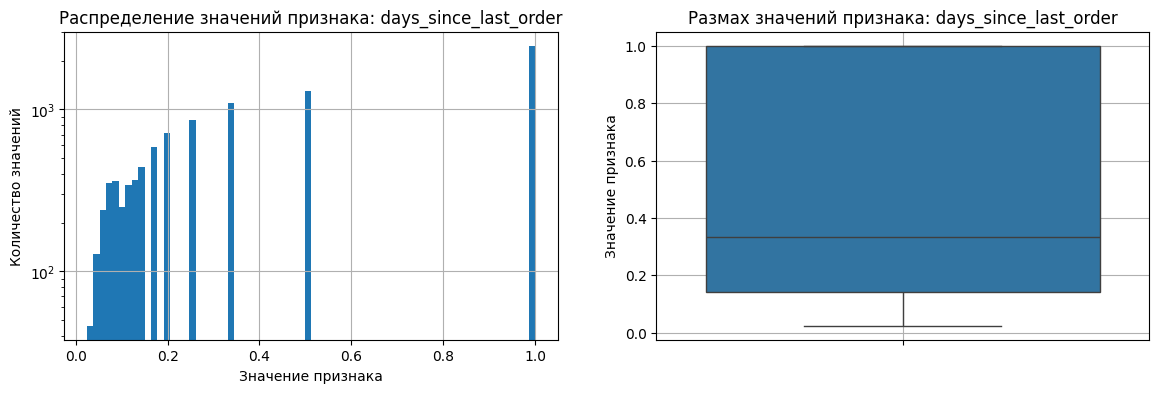

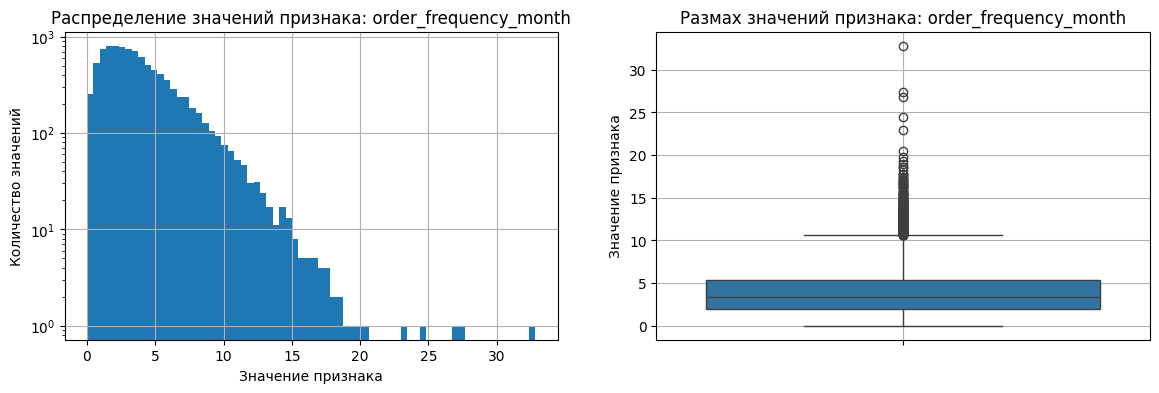

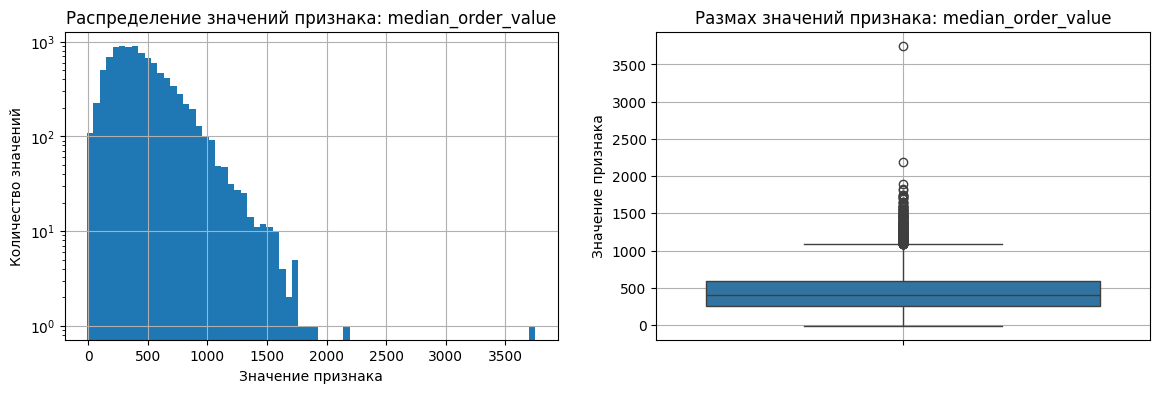

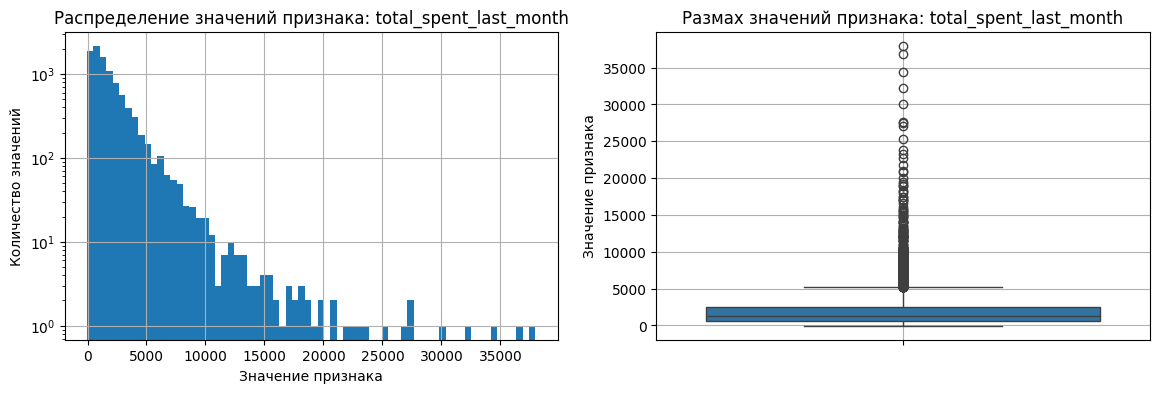

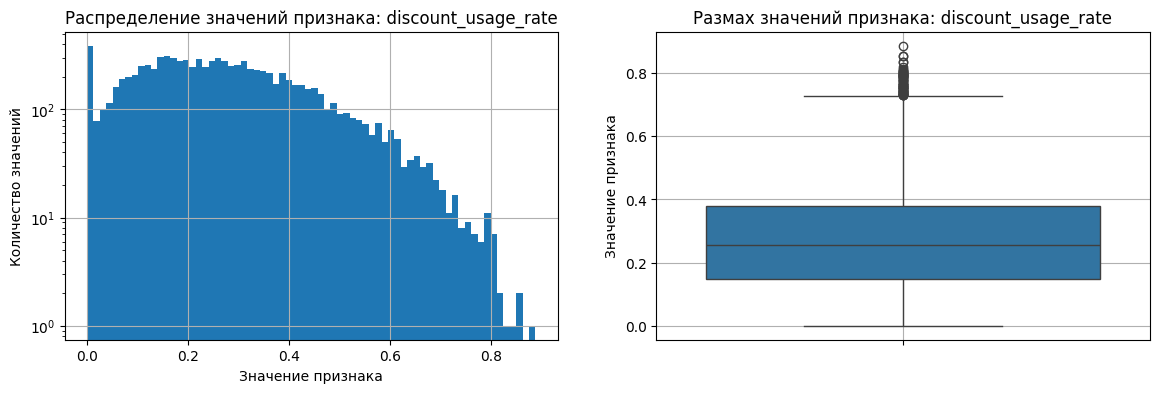

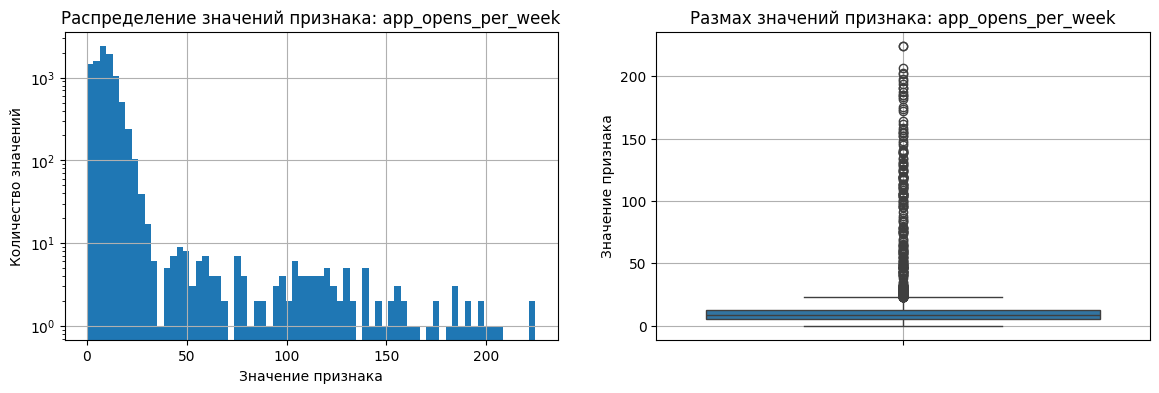

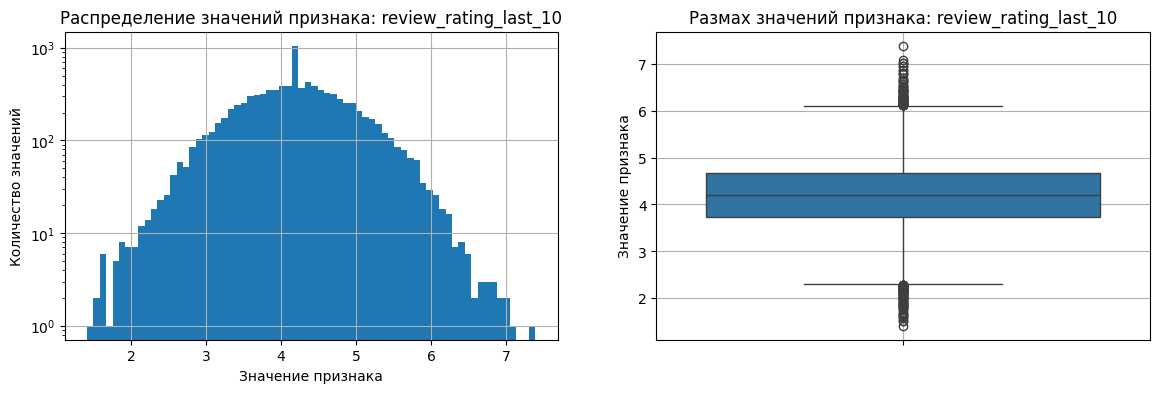

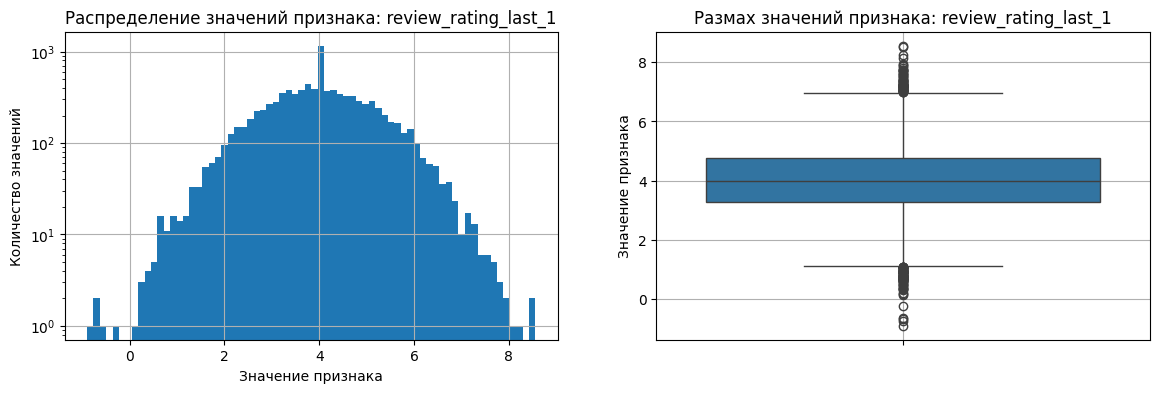

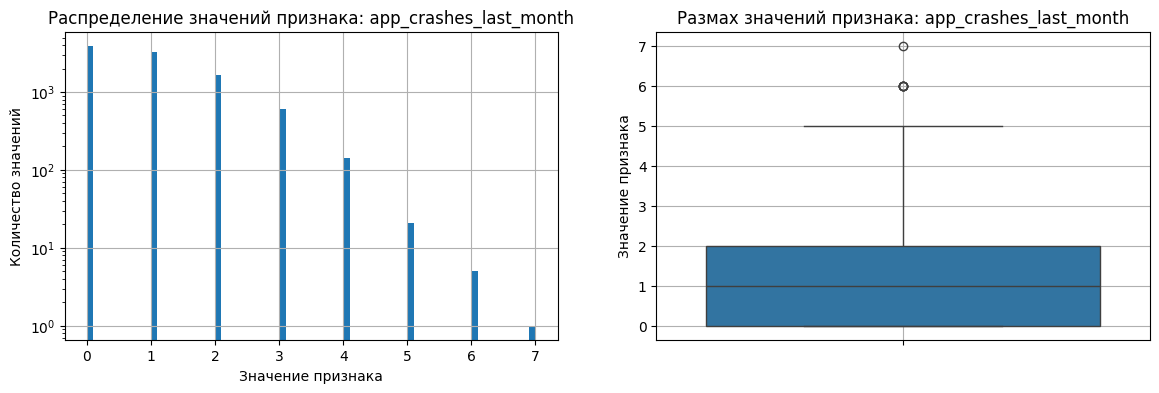

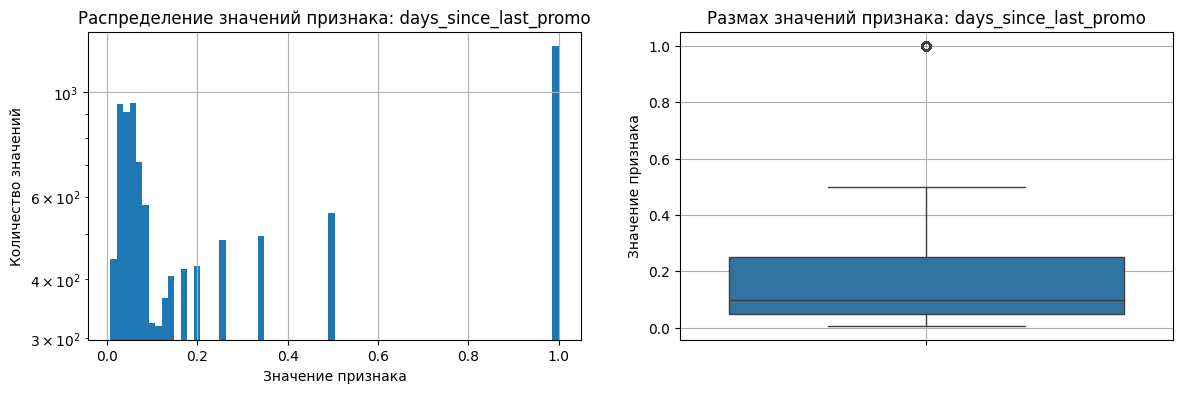

In [134]:
def get_non_binary_df(df):
    num_df = df.select_dtypes(include=['number'])
    return num_df.loc[:, ~num_df.isin([0, 1]).all()]

def get_emission_analysis(df):
    non_binary_df = get_non_binary_df(df)

    for col in non_binary_df.columns:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

        hist = axes[0]
        non_binary_df[col].plot(
            kind='hist',
            bins=70,
            grid=True,
            ax=hist
        )

        hist.set_title(f'Распределение значений признака: {col}')
        hist.set_xlabel('Значение признака')
        hist.set_ylabel('Количество значений')
        hist.set_yscale('log')

        create_df_boxplot(non_binary_df, col, axes[1])

        plt.show()
        
get_emission_analysis(df_eda)

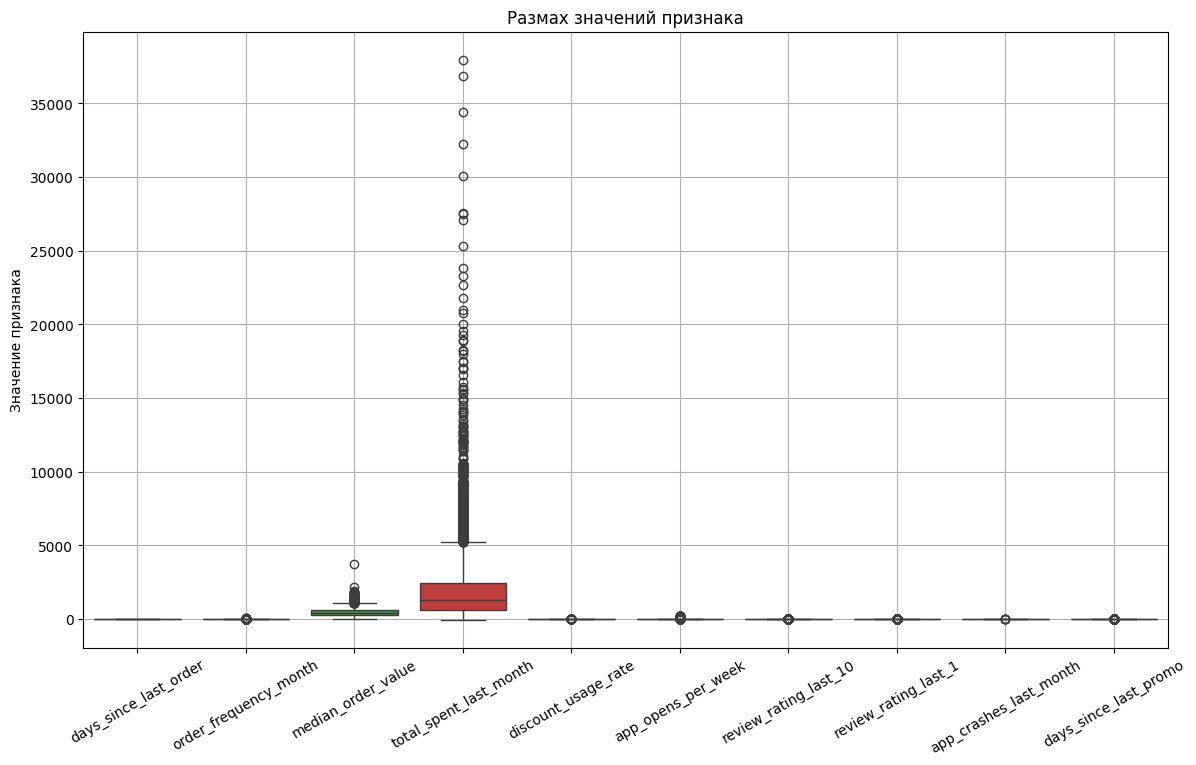

In [135]:
non_binary_df = get_non_binary_df(df_eda)

create_df_boxplot(non_binary_df)

В датасете есть строки, где числовое значение - отрицательное, что говорит об явной ошибке, поэтому такие данные стоит исключить.

In [136]:
for col in non_binary_df.columns:
    df_eda[col] = df_eda[col].clip(lower=0)

Кроме того, все признаки имеют выбросы. При попытке провести clipping, это приведёт лишь к уменьшению датасета. И данная практика не будет правильной, т.к. удаление значений выше 99 процентиля ведёт к тому, что модель научится на среднем классе, но она не сможет предсказывать поведение VIP-сегмента. В таком случае стоит провести добавление новых признаков, которые уберут выбросы и сделают распределение похожим на нормальное без удаления данных.

1. Логарифмирование применяется к денежным метрикам с тяжелым хвостом (total_spent_last_month, median_order_value, app_opens_per_week)
2. Биннинг: app_crashes_last_month - довольно неплохое распределение, но при этом обычно наличие хотя бы одного краша уже триггер для оттока, а значение больше 3 явно является критичным.

In [137]:
heavy_tailed_cols = ['total_spent_last_month', 'median_order_value', 'app_opens_per_week', 'order_frequency_month']
for col in heavy_tailed_cols:
    df_eda[f'{col}_log'] = np.log1p(df_eda[col])

df_eda['app_crashes_last_month_bin'] = pd.cut(df_eda['app_crashes_last_month'], bins=[-1, 0, 2, np.inf], labels=['Zero', 'Low', 'Critical']).astype('object')

df_eda = df_eda.drop(columns=[*heavy_tailed_cols, 'app_crashes_last_month'])

df_eda.head()

,days_since_last_order,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,notifications_enabled,review_rating_last_10,review_rating_last_1,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn,sub_size_interact,taste_profile,season_size,total_spent_last_month_log,median_order_value_log,app_opens_per_week_log,order_frequency_month_log,app_crashes_last_month_bin
0,1.0,0.337031,blend,light,almond,0,vietnam,large,pro,1,5.176792,3.302238,summer,0.142857,android,0,geo_75,1,pro_large,light_almond,summer_large,8.036247,5.566989,3.448981,2.634943,Zero
1,0.333333,0.547659,arabica,light,whole,1,guatemala,medium,none,1,4.392991,3.988047,autumn,0.058824,ios,0,geo_95,0,none_medium,light_whole,autumn_medium,6.907136,6.294524,0.000000,0.943574,Zero
2,0.083333,0.120258,arabica,medium,oat,1,guatemala,small,premium,1,4.977713,4.379219,spring,0.083333,web,1,geo_25,0,premium_small,medium_oat,spring_small,7.192288,6.158026,2.938931,1.385461,Zero
3,1.0,0.000000,robusta,medium,skim,0,brazil,medium,none,1,3.712526,3.043617,summer,0.25,android,0,geo_2,0,none_medium,medium_skim,summer_medium,8.006577,6.564602,2.518142,1.667566,Zero
4,0.25,0.074990,robusta,dark,almond,1,colombia,medium,none,0,4.528271,5.642993,winter,0.066667,ios,0,geo_19,1,none_medium,dark_almond,winter_medium,9.033452,7.090388,2.830164,2.110197,Low


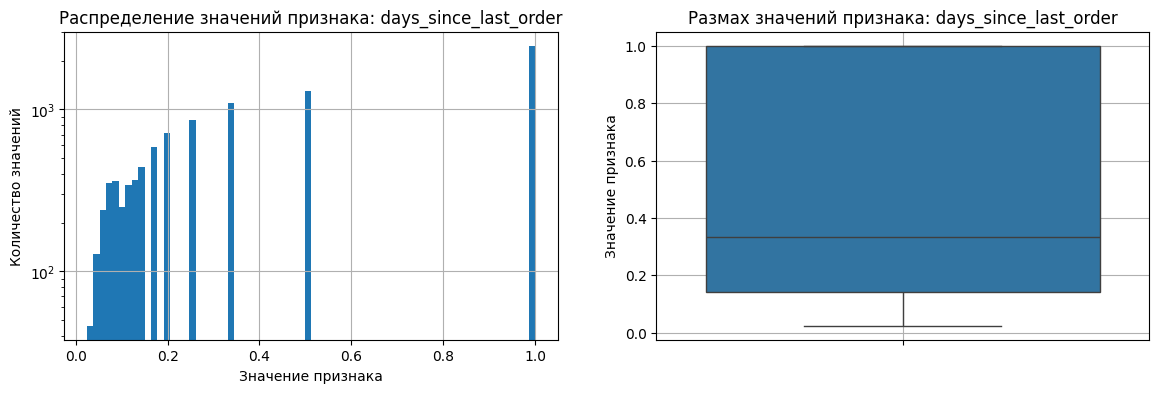

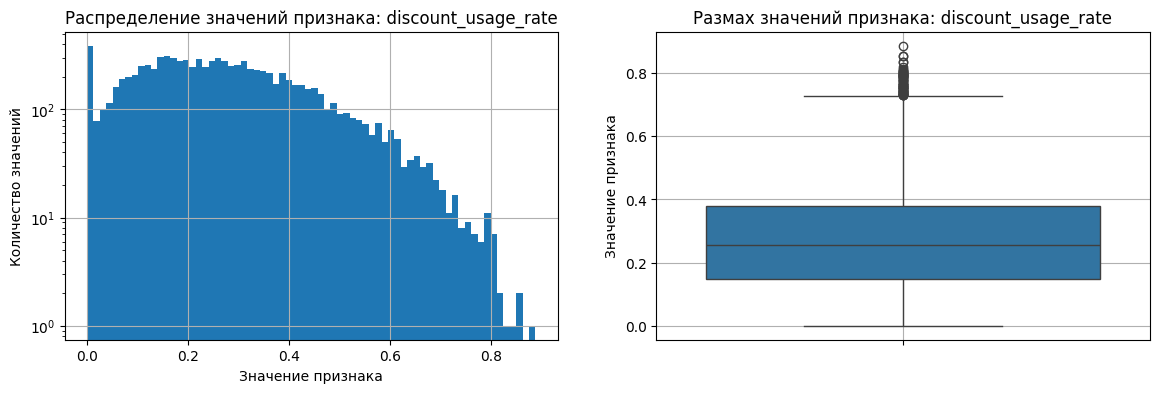

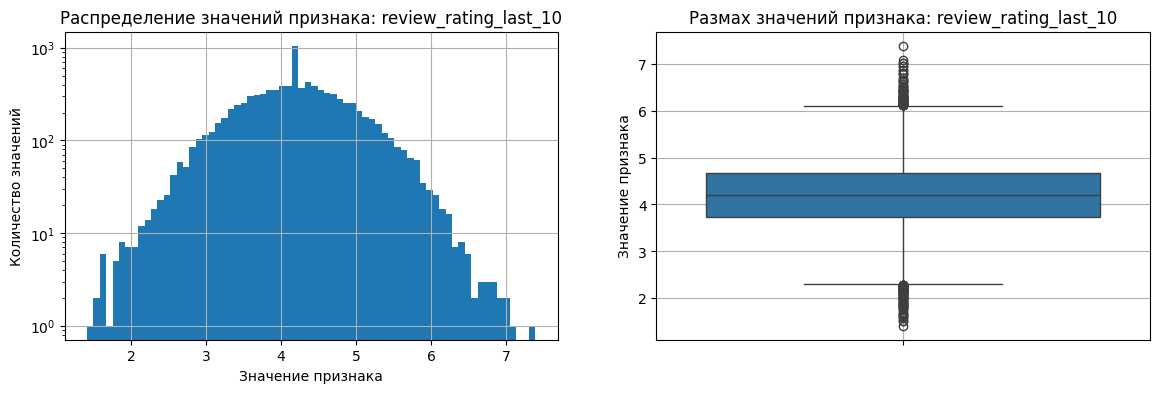

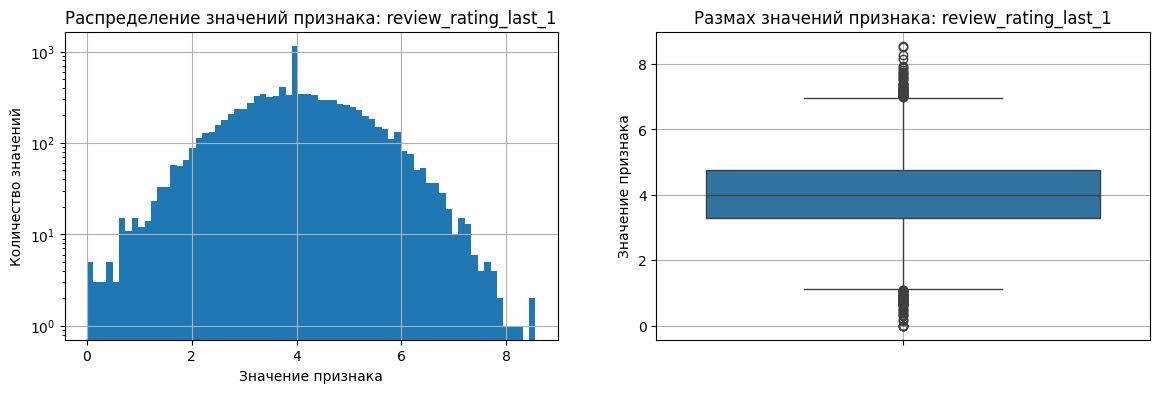

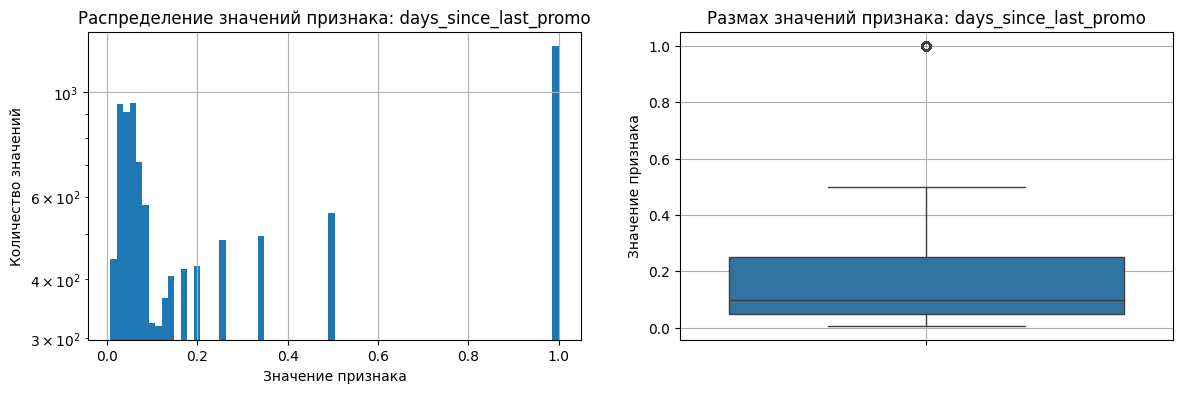

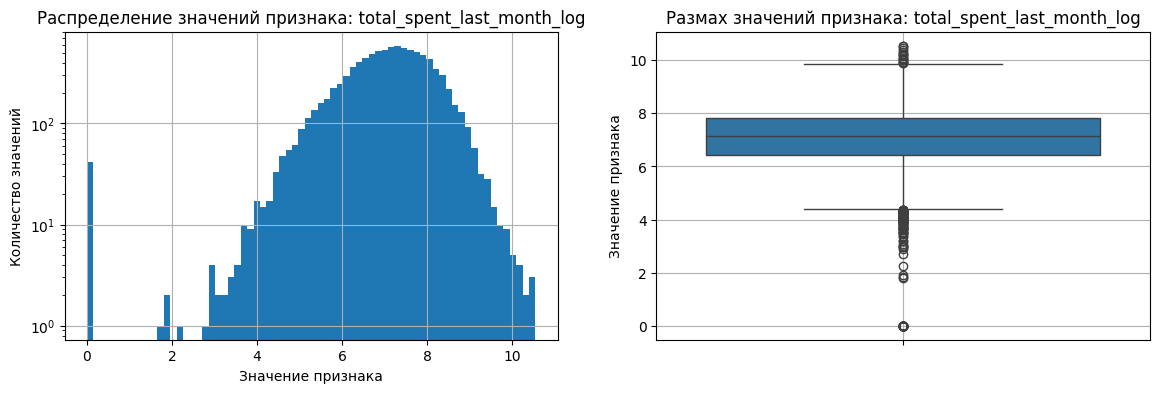

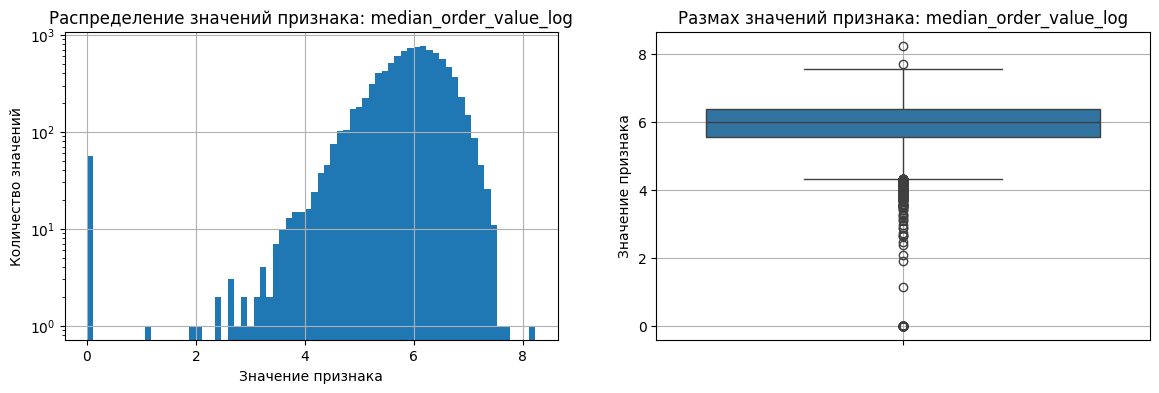

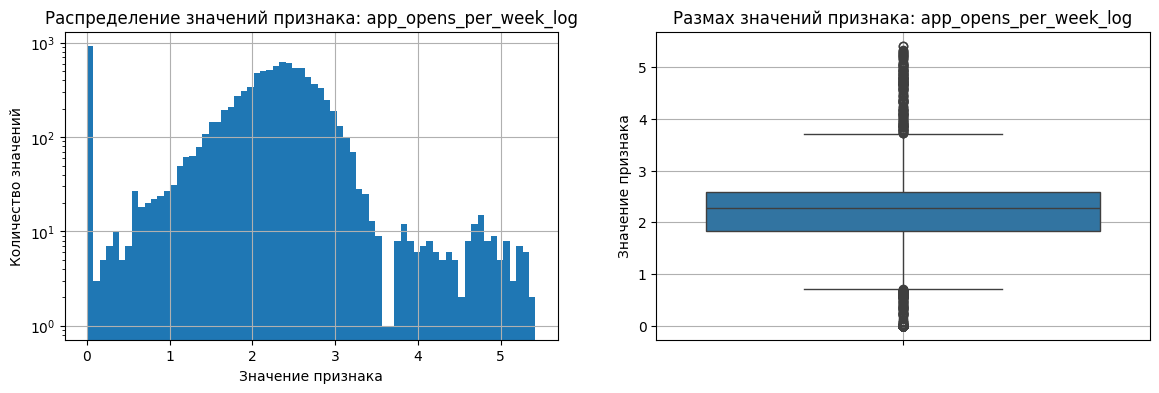

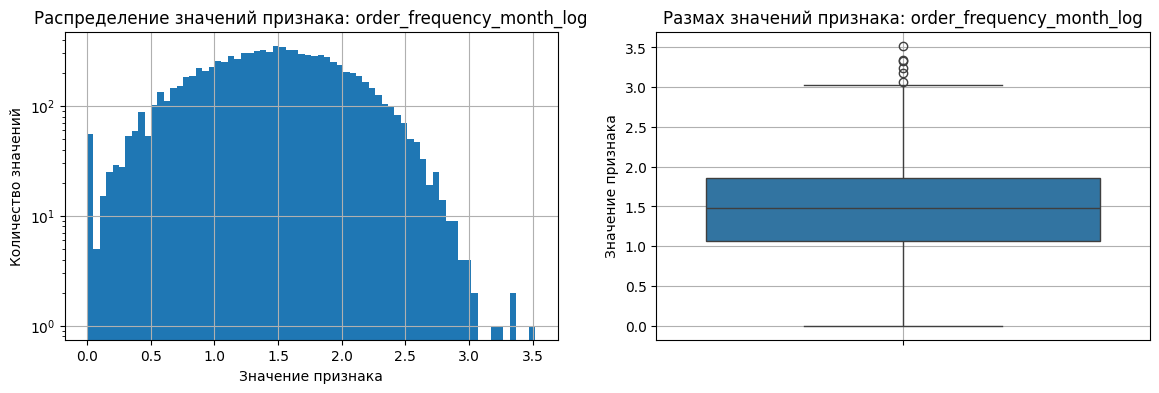

In [138]:
get_emission_analysis(df_eda)

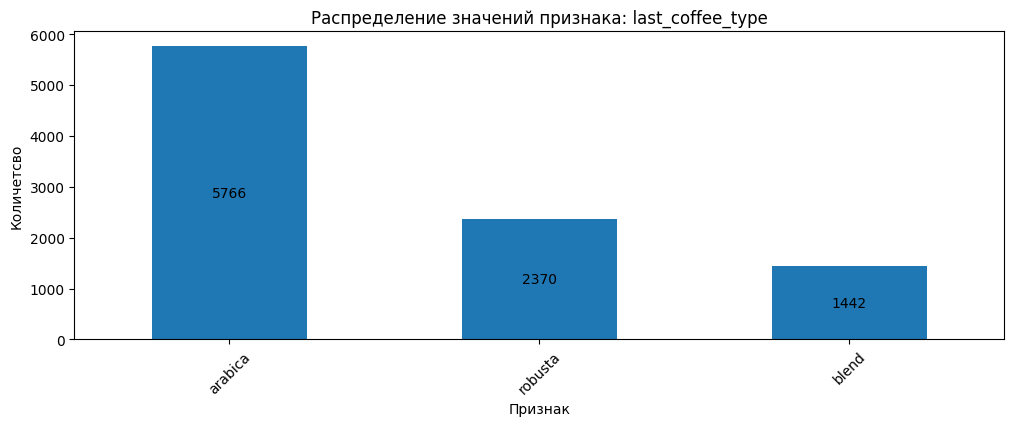

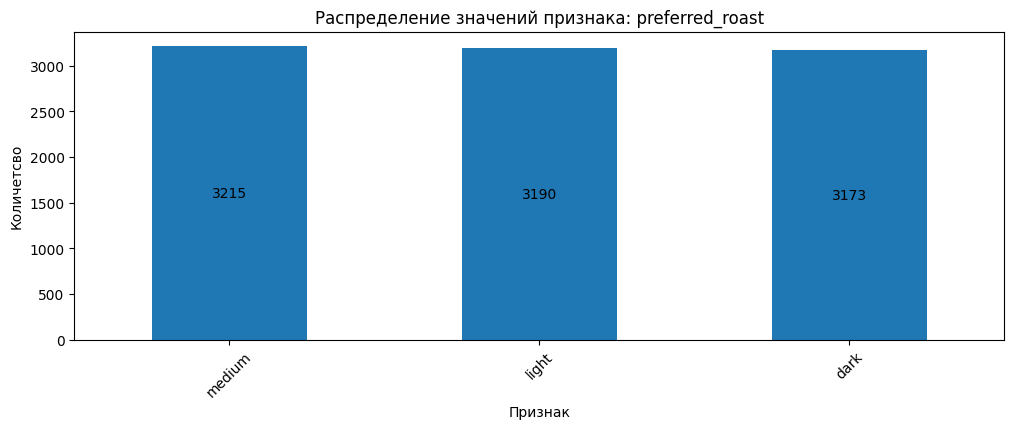

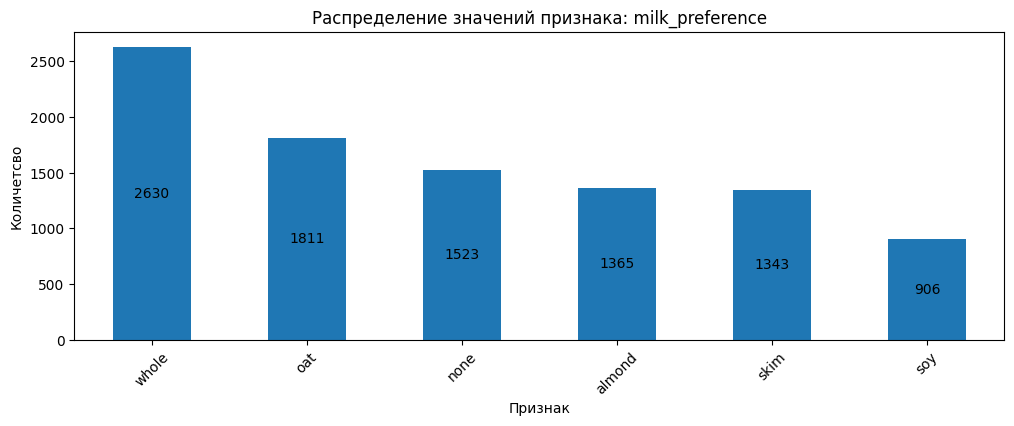

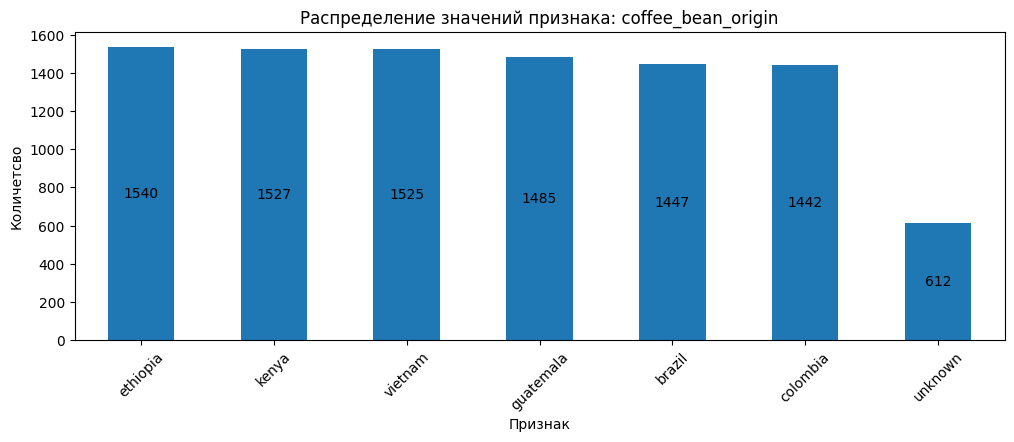

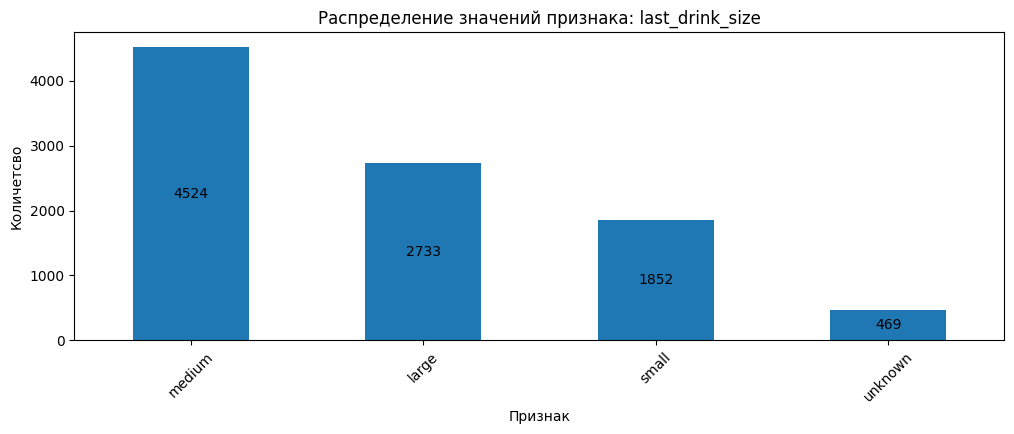

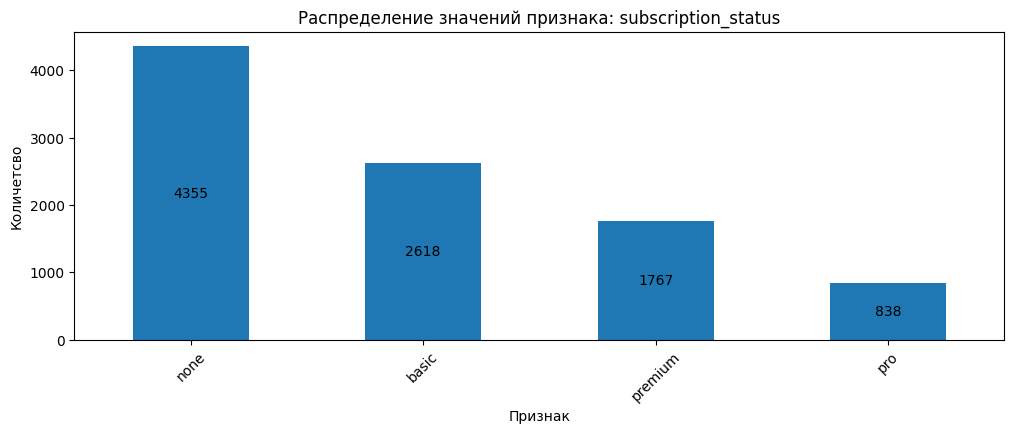

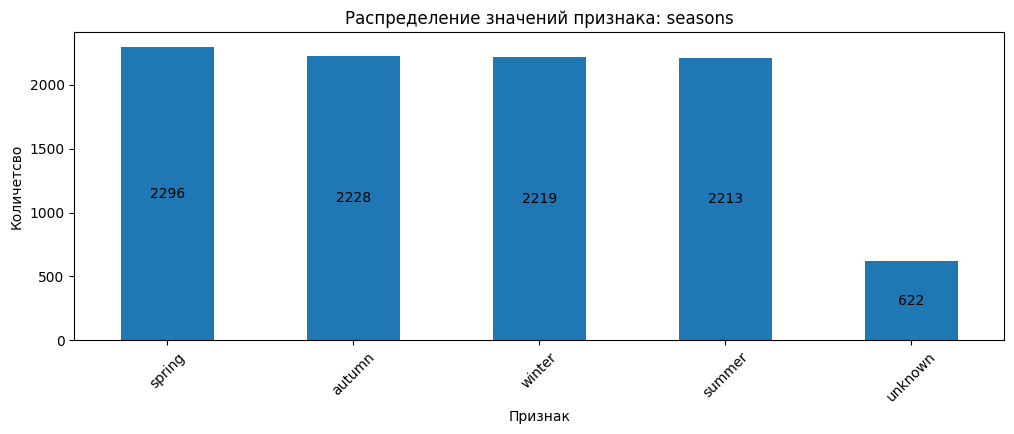

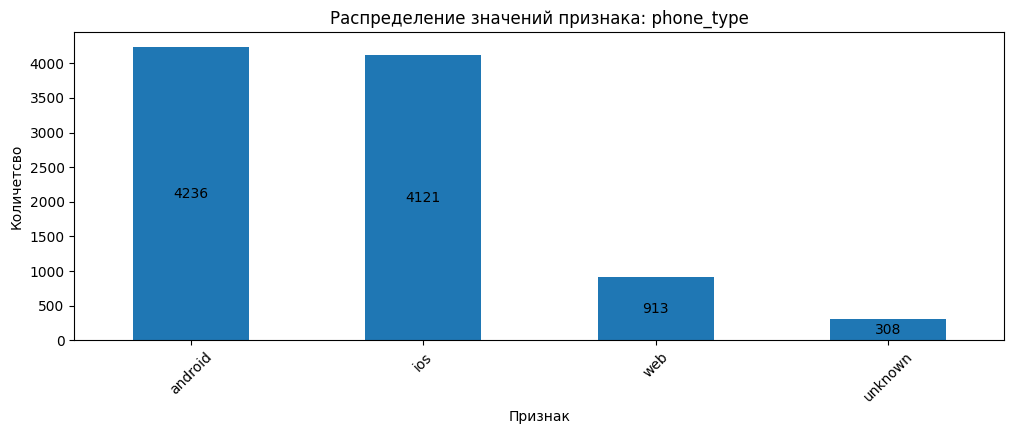

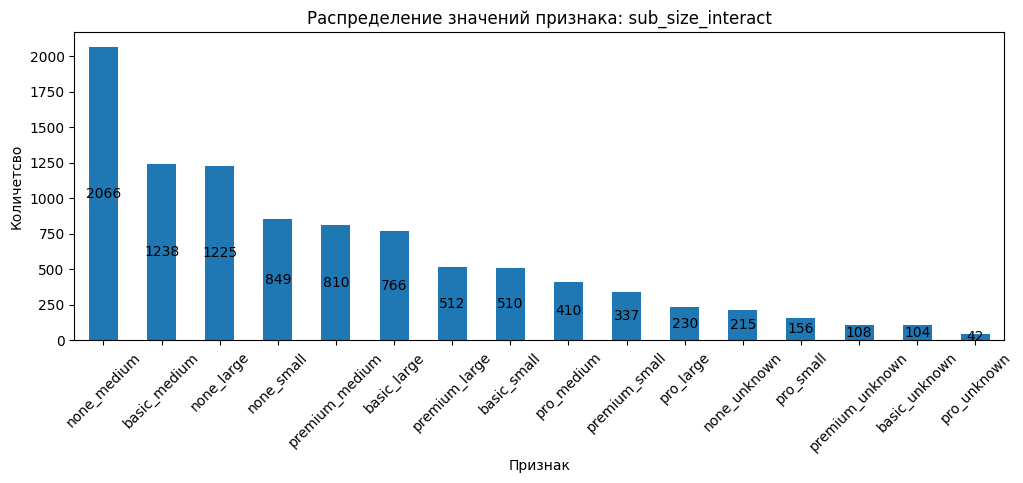

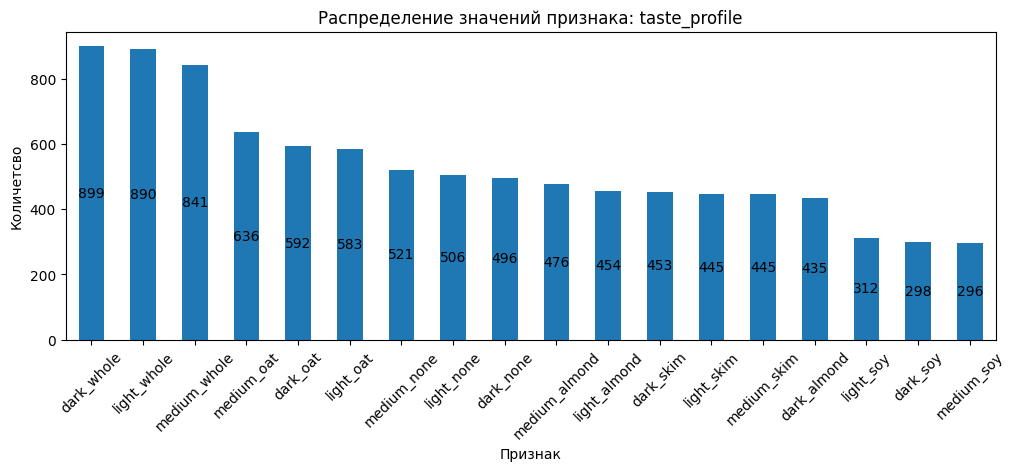

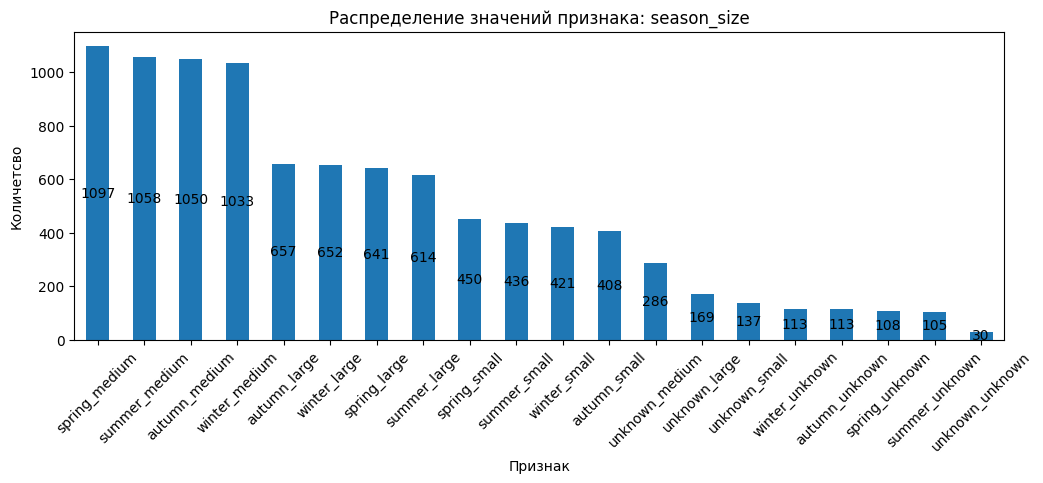

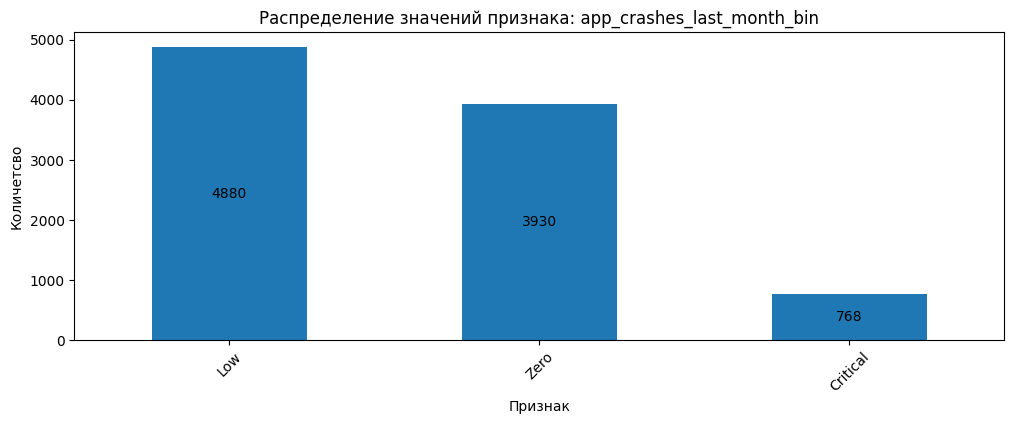

In [139]:
cat_df = df_eda.select_dtypes(include=['object', 'category'])
non_location_df = cat_df.drop(columns='geo_location')

for col in non_location_df.columns:
    ax = non_location_df[col].value_counts().plot(
        kind='bar',
        title=f'Распределение значений признака: {col}',
        xlabel='Признак',
        ylabel='Количетсво',
        figsize=(12, 4),
        rot=45
    )

    ax.bar_label(ax.containers[0], label_type='center')

    plt.show()

In [140]:
after = len(df_eda)
print(" Было строк в исходном датасете:", temp_len,
      '\n', "Осталось строк в датасете после обработки:", after,
      '\n', "Удалено строк в датасете после обработки:", temp_len-after,
      '\n', f"Процент потерь: {(temp_len-after)/temp_len*100:.2f}%")

 Было строк в исходном датасете: 10036 
 Осталось строк в датасете после обработки: 9578 
 Удалено строк в датасете после обработки: 458 
 Процент потерь: 4.56%


Итог EDA

**Удалены признаки:** id, binomial_name, registration number, measure_count, timestamp.

**Обработка:**
- weight: удалены 3 NaN-строки.
- shell_crack: удален (~76% пропусков).
- Остальные пропуски пренебрегаемы (заполнение добавит шум).
- Дубликаты: 328 явных удалено.
- Выбросы: shell_length и shell_width (ошибочный перевод в см волонтером), weight=0 — исключены.

**Статистика:** 2829 => 2393 строк (удалено 436, 15.41%).

---

In [141]:
def create_heatmap(corr, title, ax=None):
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()

    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5,
        cbar=False,
        ax=ax
    )
    
    ax.set_title(title)
    
    if len(ax.figure.get_axes()) == 1:
        plt.show()

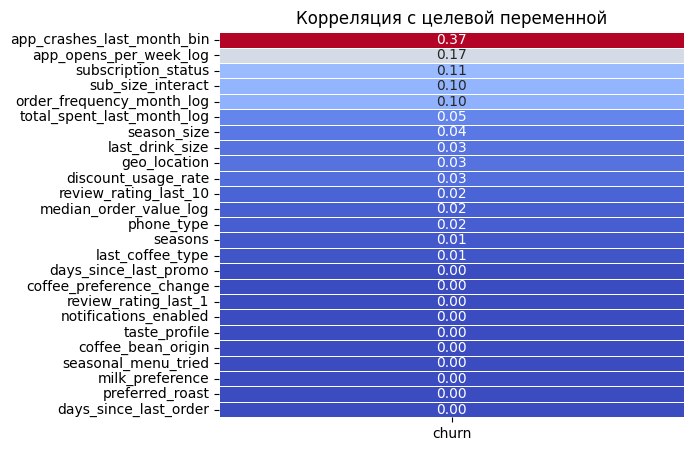

In [148]:
corr_matrix = df_eda.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'discount_usage_rate', 'seasonal_menu_tried', 'notifications_enabled', 'review_rating_last_10', 'review_rating_last_1', 'days_since_last_promo', 'coffee_preference_change', 'churn', 'total_spent_last_month_log', 'median_order_value_log', 'app_opens_per_week_log', 'order_frequency_month_log'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')

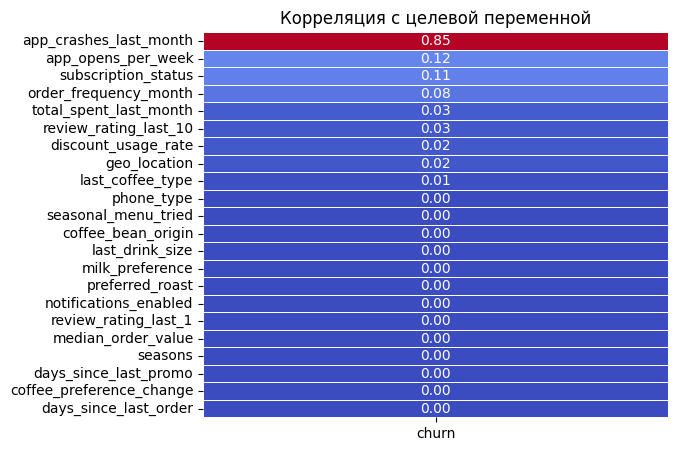

In [151]:
corr_matrix = df.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'order_frequency_month', 'median_order_value', 'total_spent_last_month', 'discount_usage_rate', 'seasonal_menu_tried', 'app_opens_per_week', 'notifications_enabled', 'review_rating_last_10', 'review_rating_last_1', 'app_crashes_last_month', 'days_since_last_promo', 'coffee_preference_change', 'churn'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')


6. Проанализируйте выбросы.

   - Определите, как они влияют на данные.

   - Выберите способ, которым их можно обработать.

7. Посчитайте корреляции между признаками. Постройте необходимые визуализации. Определите, есть ли признаки, которые можно убрать, на основании их корреляции с другими.

8. Напишите выводы по результатам исследовательского анализа данных.

1. Улучшения (Успех) ✅

В большинстве случаев корреляция выросла. Это значит, что новые признаки стали информативнее для модели.

    app_opens_per_week (0.116 -> 0.173):
    Логарифмирование (_log) сработало отлично! Рост корреляции на ~50%. Это подтверждает гипотезу, что важен порядок величины активности, а не точное число.

    total_spent_last_month (0.031 -> 0.050):
    Логарифм трат стал сильнее связан с оттоком. Это классика: разница в тратах на низких уровнях важнее, чем на высоких.

    order_frequency_month (0.080 -> 0.095):
    Та же история. Логарифм частоты лучше предсказывает отток.

    median_order_value (0.000 -> 0.017):
    Раньше корреляция была нулевой (мусор), теперь появилась хоть какая-то связь.

2. Странная ситуация с app_crashes (Внимание!) ⚠️

    Было: app_crashes_last_month = 0.853 (Колоссальная связь!)

    Стало: app_crashes_last_month_bin = 0.369 (Упала более чем в 2 раза)

Что произошло?
Биннинг (превращение числа в категории Zero/Low/Critical) "убил" часть информации.

    Гипотеза 1 (Data Leakage в оригинале): Корреляция 0.85 — это подозрительно много для реальной жизни. Возможно, в исходных данных была прямая зависимость (например, "если крэшей > 10, то churn=1" по правилам системы). Если так, то падение корреляции — это хорошо, вы убрали утечку данных и сделали модель более робастной.

    Гипотеза 2 (Слишком грубый биннинг): Возможно, разница между 5 и 20 крэшами все-таки важна, а вы слили их в одну категорию "Critical".

Рекомендация:
Для app_crashes оставьте оба варианта: и исходный числовой столбец, и бинарный/категориальный. Пусть модель (особенно если это дерево) сама выберет, что ей полезнее. Если вы используете линейную модель, попробуйте сделать биннинг более детальным или верните логарифм количества крэшей.
3. Остальные признаки

    subscription_status (0.105): Стабилен, трансформация не повлияла (логично).

    review_rating_last_10 (0.025 -> 0.021): Чуть упала, но незначительно. Средний рейтинг — слабый предиктор в обоих случаях.

    Нулевые корреляции: days_since_last_order, days_since_last_promo и другие так и остались нулями. Это значит, что линейной связи там нет. 

## Этап 3. Предобработка данных

1. Разделите данные в пропорции 80 к 20. 20% данных отложите для теста. Остальные используйте для обучения и кросс-валидации модели.

2. Предобработайте данные. Используйте информацию о пропусках и категориальных признаках только из обучающей выборки.

   - Создайте пайплайн, который обработает пропуски и выбросы.

   - Создайте пайплайн, который обработает категориальные признаки.

   - Создайте пайплайн, который обработает числовые признаки: проведёт масштабирование и нормализацию.



In [152]:
X = df.drop(columns='churn')
y = df['churn']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    stratify=y,
    shuffle=True,
    random_state=RANDOM_STATE
)

print(f"Размер обучающей выборки: {X_train_val.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Доля положительного класса в train: {y_train_val.mean():.3f}")
print(f"Доля положительного класса в test: {y_test.mean():.3f}")

Размер обучающей выборки: (8028, 22)
Размер тестовой выборки: (2008, 22)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


## Этап 4. Обучение модели

1. Обучите базовую версию модели.
   - Используйте для этого простые статистические модели.

   - Используйте кросс-валидацию для обучения модели.

2. Посчитайте метрики, поставленные в задаче. Опираясь на них, сделайте вывод о качестве модели.

## Этап 5. Создание новых признаков

1. Добавьте новые признаки, которые могут улучшить качество модели. Опирайтесь на наработки, полученные в ходе исследовательского анализа данных, и на логику решаемой задачи.

   - Извлечение квадратного корня поможет сгладить большие значения.

   - Возведение в квадрат усилит влияние больших значений.

2. Обновите пайплайн для работы с новыми признаками, проведите повторную кросс-валидацию, сравните результаты моделей с новыми признаками и без них.

3. Интерпретируйте коэффициенты модели, а затем на их основании выявите значимые признаки и удалите лишние для модели.

## Этап 6. Эксперименты с гиперпараметрами

1. Перечислите все гиперпараметры, с которыми планируете экспериментировать.

2. Проведите систематический перебор гиперпараметров для `LogisticRegression`, выполните кросс-валидацию для каждой конфигурации.

3. Составьте таблицу с результатами.

4. Выберите лучшую модель, ориентируясь на заданную метрику качества.

## Этап 7. Подготовка финальной модели

Объедините лучшую конфигурацию гиперпараметров с оптимальным набором признаков. Обучите модель на всех данных для кросс-валидации и проведите финальную оценку на отложенной тестовой выборке.


## Этап 8. Отчёт о проделанной работе

Проанализируйте итоговые метрики модели и факторы, которые на них повлияли. Составьте описание, выделив наиболее важные факторы.

## Этап 9. Сохранение модели для продакшена

Сохраните итоговую модель и пайплайн предобработки. Убедитесь, что всё работает: загрузите артефакты и проверьте их на тестовых данных. В решении укажите ссылку для скачивания сохранённых файлов.